<IPython.core.display.Javascript object>


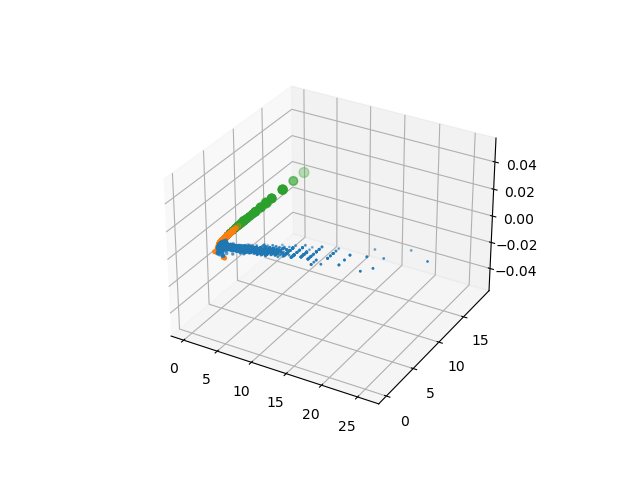

The centroinds are:
[3.002159   3.36649927 2.79405321]
[1.52222839 3.97017183 6.40470736]
[ 1.18191654  6.67795981 14.85007728]
[4343, 5731, 5664] [1238, 3539, 783] [135, 1101, 58]


<IPython.core.display.Javascript object>


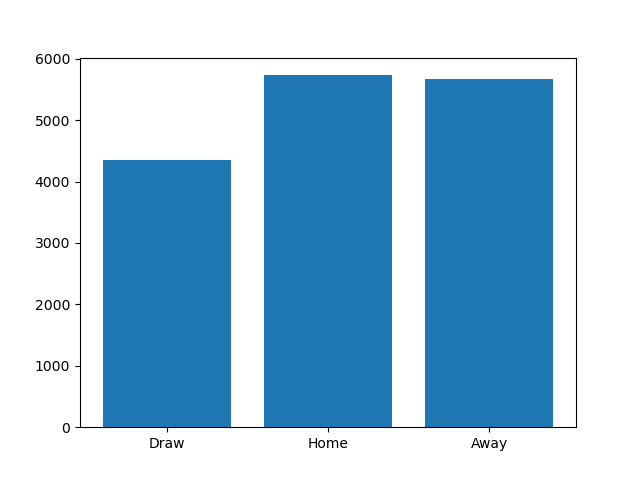

<IPython.core.display.Javascript object>


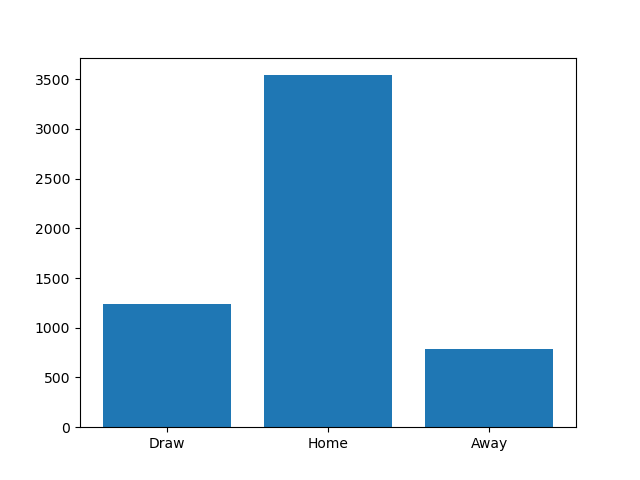

<IPython.core.display.Javascript object>


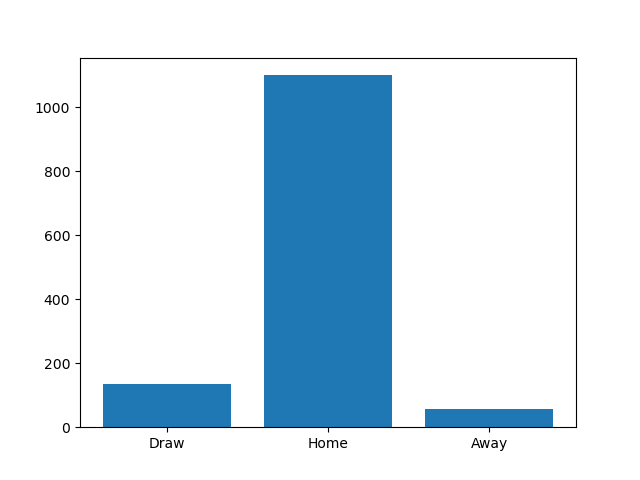

In [1]:
%config Completer.use_jedi = False
%matplotlib notebook
from sklearn.cluster import KMeans
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique, where
from mpl_toolkits.mplot3d import Axes3D 

df = pd.read_csv("LB.csv")
data = np.array(df.iloc[:,0:3])
results = np.array(df.iloc[:,3])
classes = ["Draw","Home","Away"]


model = KMeans(n_clusters=3)
model.fit(data)

yhat = model.predict(data)
clusters = unique(yhat)

#Creating the 3D plot
fig1 = plt.figure(1)
ax = fig1.add_subplot(111, projection="3d")


for cluster in clusters:
    row_x = where(yhat == cluster)
    pyplot.scatter(data[row_x,0], data[row_x,1],data[row_x,2])


centroids = model.cluster_centers_
print("The centroinds are:")
for centroid in centroids:
    print(centroid)
    

    
a = []
c1Results = []
c2Results = []
c3Results = []
#finding wich elements belong to classes 0,1 and 2
for cluster in clusters:
    row_x = where(yhat == cluster)
    a.append(row_x[0])
    #print(row_x[0])
    
#print(a[0],a[1],a[2])
#Appending the true results in c1Results,c2Results,c3Results 
for i in a[0]:
    c1Results.append(results[i])
for i in a[1]:
    c2Results.append(results[i])
for i in a[2]:
    c3Results.append(results[i])

c0,c1,c2 = 0,0,0
#Counting how many Draws,Homes and Aways we get in each Class
for i in c1Results:
    if i==0.0:
        c0 = c0+1
    elif i==1.0:
        c1 = c1+1
    elif i==2.0:
        c2 = c2+1
        
c3,c4,c5 = 0,0,0
for i in c2Results:
    if i==0.0:
        c3 = c3+1
    elif i==1.0:
        c4 = c4+1
    elif i==2.0:
        c5 = c5+1

c6,c7,c8 = 0,0,0
for i in c3Results:
    if i==0.0:
        c6 = c6+1
    elif i==1.0:
        c7 = c7+1
    elif i==2.0:
        c8 = c8+1

countC1 = [c0,c1,c2]
countC2 = [c3,c4,c5]
countC3 = [c6,c7,c8]
print(countC1,countC2,countC3)

#Ploting the propability bars for every class
fig2 = plt.figure(2)
plt.bar(classes,countC1)
plt.show() 

fig3 = plt.figure(3)
plt.bar(classes,countC2)
plt.show()

fig4 = plt.figure(4)
plt.bar(classes,countC3)
plt.show()

